In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facebook-ads-2/Facebook_Ads_2.csv


# Problem Statement

In this notebook, we seek to predict advertisement click-through decisions based on user features.

> Takeaways from this project: 
Standardizing input may significantly increase accuracy!

# Step 1: import packages and dataset

In [2]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load dataset
data = pd.read_csv('../input/facebook-ads-2/Facebook_Ads_2.csv', encoding='latin-1')
data.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


# Step 2: Explore and visualize the dataset

Answer the below questions:
1. How many users are there in total?
2. How many users clicked through the ads?
3. How many users did not click through the ads?

In [4]:
print("The total number of users in this dataset is: ", len(data))
print("The number of users who clicked through the ads is: ", len(data[data['Clicked']==1]))
print("The number of users who did not click through the ads is: ", len(data[data['Clicked']==0]))

The total number of users in this dataset is:  499
The number of users who clicked through the ads is:  250
The number of users who did not click through the ads is:  249


The dataset is pretty balanced, given that the number of users who clicked and didn't clicked the ads are almost 1:1.

Visualize the below distributions by click through decisions and on their own:
* Country
* Time spent
* Salary

In [5]:
#Count by country
data['Country'].value_counts()

Israel          6
Bolivia         6
Mauritania      6
Guinea          5
Armenia         5
               ..
Palau           1
Saudi Arabia    1
Denmark         1
Mexico          1
Seychelles      1
Name: Country, Length: 210, dtype: int64

There is no clear concentration of countries where the users come from, and for this reason this variable may not be very useful for fitting the model or predicting clickthrough decisions of new users.

<Figure size 864x360 with 0 Axes>

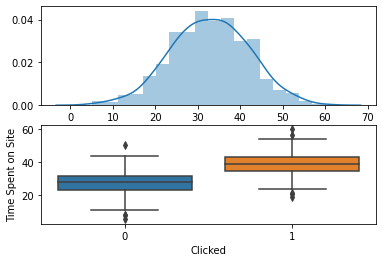

In [6]:
#Distribution of time spent
plt.figure(figsize=[12,5])
fig, ax = plt.subplots(2)
sns.distplot(data['Time Spent on Site'], ax = ax[0])
sns.boxplot(x='Clicked', y='Time Spent on Site', data = data, ax = ax[1])
plt.show()

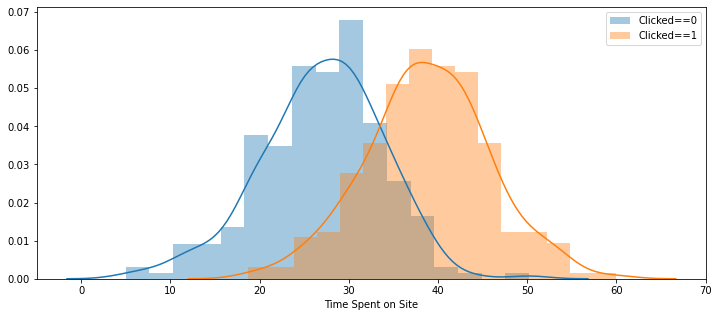

In [7]:
plt.figure(figsize = [12,5])
sns.distplot(data[data['Clicked']==0]['Time Spent on Site'], label = 'Clicked==0')
sns.distplot(data[data['Clicked']==1]['Time Spent on Site'], label = 'Clicked==1')
plt.legend()
plt.show()

The time spent on site is approximately normally distributed. Nevertheless, there is a clear distinction of click through decisions by time spent on site. When the medians are compared, users who clicked at the ads spend 10% more time on the website than users who did not click at the ads.

<Figure size 864x360 with 0 Axes>

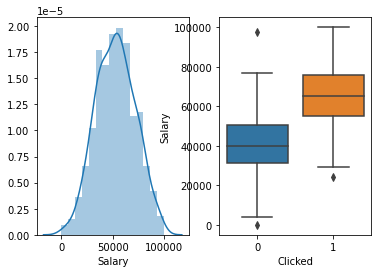

In [8]:
#Distribution of salary
plt.figure(figsize = (12,5))
fig, ax = plt.subplots(1,2)
sns.distplot(data['Salary'], ax = ax[0])
sns.boxplot(data = data, x = 'Clicked', y = 'Salary', ax = ax[1])
plt.show()

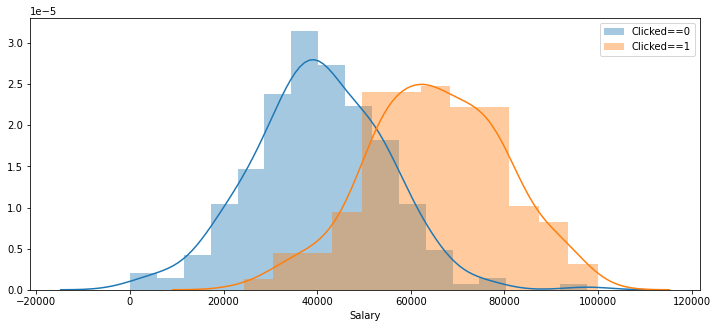

In [9]:
plt.figure(figsize = [12,5])
sns.distplot(data[data['Clicked']==0]['Salary'], label = 'Clicked==0')
sns.distplot(data[data['Clicked']==1]['Salary'], label = 'Clicked==1')
plt.legend()
plt.show()

Similar to the time spent on site, salary is approximately normally distributed. Nevertheless, there is a clear distinction of click through decisions by salary. Users who clicked through the ads have higher average & median salaries than users who didn't.

# Step 3: cleaning and preparing data for training

Action items for this section:
* Dropping unnecessary columns
* Imputing missing data
* One hot coding for categorical variables
* Standardizing the independent variables
* Splitting data into training, testing

In [10]:
#Drop name, email, country
data.drop(['Names','emails','Country'], axis = 1, inplace = True)
data.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


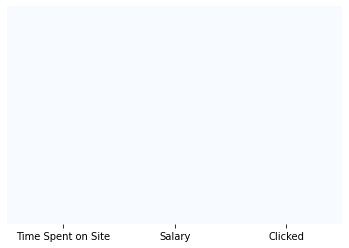

In [11]:
#Check on missing data
sns.heatmap(data.isnull(), yticklabels = False, cmap = 'Blues', cbar = False)

In [12]:
#Split data into dependent and independent variables
X = data.drop(['Clicked'], axis = 1).values
y = data['Clicked'].values

In [13]:
#Scale X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Step 4 Model training

In [15]:
#Import and fit logistic regression mode
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
y_pred = LR.predict(X_test)

# Step 5 Model Evaluation

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



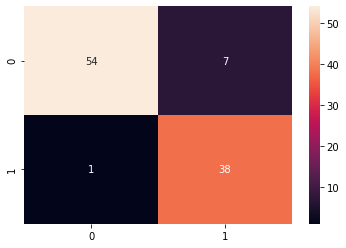

In [17]:
#Import and run confusion matrix & classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
print(classification_report(y_test, y_pred))